<a href="https://colab.research.google.com/github/Franklinyeruan/CHEM101.6/blob/main/Wk2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello there! 
By: Franklin Ruan <br>
Week 2 Project on MD Simulations

# Installation and Imports :^) 

General Rule of thumb: pip install before you conda install

In [2]:
# Nglview (Must install these first)
!pip install -q nglview pytraj
from google.colab import output
output.enable_custom_widget_manager()

# install dependencies 
!pip -q install py3Dmol 2>&1 1>/dev/null
!pip install --upgrade MDAnalysis 2>&1 1>/dev/null
!pip install biopandas 2>&1 1>/dev/null

     |████████████████████████████████| 5.7 MB 6.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 16.1 MB 12.5 MB/s 


In [3]:
# Openmm
import sys
print(sys.version)
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
!bash Miniconda3-py*.sh -bfp /usr/local
!conda config --set always_yes yes
!conda config --add channels conda-forge
!conda create -n openmm python=3.7 cudatoolkit=10.0 git jupyterlab numpy pandas scipy matplotlib ipympl rdkit openbabel openmm mdtraj pymbar pdbfixer parmed openff-toolkit openmoltools openmmforcefields
sys.path.append('/usr/local/envs/openmm/lib/python3.7/site-packages')
import openmm.testInstallation
openmm.testInstallation.main()

3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
--2022-01-17 20:10:52--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89026327 (85M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.10.3-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>]  84.90M   106MB/s    in 0.8s    

2022-01-17 20:10:53 (106 MB/s) - ‘Miniconda3-py37_4.10.3-Linux-x86_64.sh’ saved [89026327/89026327]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2021.7.5=h06a4308_1
    - certifi==2021.5.30=py37h

In [4]:
# mdtraj 
!conda install -c conda-forge mdtraj 

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mdtraj


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-4.5          |           1_llvm           5 KB  conda-forge
    conda-4.11.0               |   py37h89c1867_0        16.9 MB  conda-forge
    krb5-1.19.2                |       hcc1bbae_0         1.4 MB  conda-forge
    llvm-openmp-12.0.1         |       h4bd325d_1         2.8 MB  co

In [5]:
# Imports
import mdtraj as md
import nglview as ngl
import openmm as mm
from openmm import *
from openmm.app import *
from openmm.unit import *
import os
import urllib.request  
import numpy as np
#import mdanalysis as mda
import py3Dmol
from __future__ import print_function
import pytraj as pt
import platform
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata
import seaborn as sb
from statistics import mean, stdev
from pytraj import matrix
from matplotlib import colors
from IPython.display import set_matplotlib_formats

Load Trajectory 

In [6]:
# The command reads all atomic positiosn and keep tracks of atom connectivity (topology)
traj = md.load('/content/drive/MyDrive/School /CHEM 96: Computational Chem /Project 1/data/butane_sim.dcd', top='/content/drive/MyDrive/School /CHEM 96: Computational Chem /Project 1/data/butane.pdb')
traj

<mdtraj.Trajectory with 100000 frames, 14 atoms, 1 residues, without unitcells at 0x7ff50713ae10>

In [7]:
#Lets select the topology
top=traj.topology
top

<mdtraj.Topology with 1 chains, 1 residues, 14 atoms, 13 bonds at 0x7ff4dfae8e10>

In [8]:
#Select All Carbon Atoms
C_sel=top.select("type C")
print(C_sel)
#Confirm that we have selected what we think we have
for atom in C_sel:
    print(top.atom(atom))

[ 0  4  7 10]
NBU1-C1
NBU1-C2
NBU1-C3
NBU1-C4


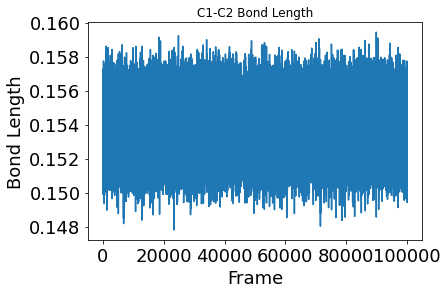

In [9]:
#Compute Some Distances and plot the time course
import matplotlib.pyplot as plt

bond_indices = [0, 4] 
C1C2bondlength = md.compute_distances(traj, [bond_indices])
plt.plot(C1C2bondlength)
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('Bond Length', size=18)
plt.title('C1-C2 Bond Length')
plt.show()

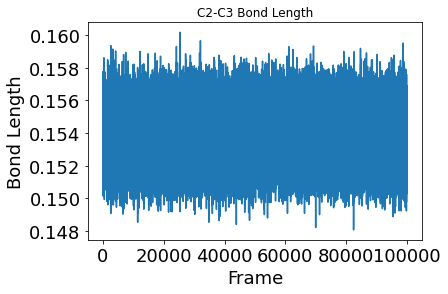

In [10]:
bond_indices = [4, 7] 
C2C3bondlength = md.compute_distances(traj, [bond_indices])
plt.plot(C2C3bondlength)
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('Bond Length', size=18)
plt.title('C2-C3 Bond Length')
plt.show()

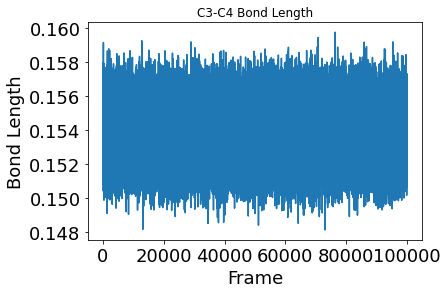

In [11]:
bond_indices = [7, 10] 
C3C4bondlength = md.compute_distances(traj, [bond_indices])
plt.plot(C3C4bondlength)
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('Bond Length', size=18)
plt.title('C3-C4 Bond Length')
plt.show()

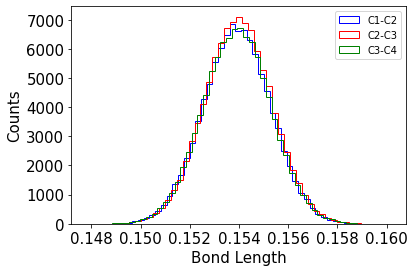

In [12]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
plt.hist(C1C2bondlength,label='C1-C2',color='b',histtype='step',bins=50)
plt.hist(C2C3bondlength,label='C2-C3',color='r',histtype='step',bins=50)
plt.hist(C3C4bondlength,label='C3-C4',color='g',histtype='step',bins=50)
plt.legend(loc='upper right')
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Counts', size=15)
plt.yticks(size=15)
plt.show()


# Variances and Standard Deviation (✓)

In [13]:
######Class Activtiy: Calculate the Variance and Standard Deviation 

In [14]:
###SOLUTION###
def variance(data):
    ave=np.average(data)
    var= np.average((data-ave)**2)
    std=var**0.5
    return var,std

C1C2var,C1C2std=variance(C1C2bondlength)
C2C3var,C2C3std=variance(C2C3bondlength)
C3C4var,C3C4std=variance(C3C4bondlength)
print("C1-C2 var:",C1C2var,"C2-C3 var:",C2C3var,"C3-C4 var:",C3C4var)
print("C1-C2 std:",C1C2std,"C2-C3 std:",C2C3std,"C3-C4 std:",C3C4std)

C1-C2 var: 1.8820589e-06 C2-C3 var: 1.8758352e-06 C3-C4 var: 1.8889715e-06
C1-C2 std: 0.0013718815116745646 C2-C3 std: 0.001369611335317526 C3-C4 std: 0.0013743985944969946


In [15]:
#Lets Check Our Answers with the Built In Numpy Libraries
print("C1-C2 average:",np.average(C1C2bondlength),"variance:",np.var(C1C2bondlength),"std-dev:",np.std(C1C2bondlength))
print("C2-C3 average:",np.average(C2C3bondlength),"variance:",np.var(C2C3bondlength),"std-dev:",np.std(C2C3bondlength))
print("C3-C4 average:",np.average(C3C4bondlength),"variance:",np.var(C3C4bondlength),"std-dev:",np.std(C3C4bondlength))

C1-C2 average: 0.15390219 variance: 1.8820589e-06 std-dev: 0.0013718815
C2-C3 average: 0.15395014 variance: 1.8758352e-06 std-dev: 0.0013696114
C3-C4 average: 0.15390702 variance: 1.8889715e-06 std-dev: 0.0013743986


# Correlation (✓)

Line Parameters: [0.50013395 0.07697477]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


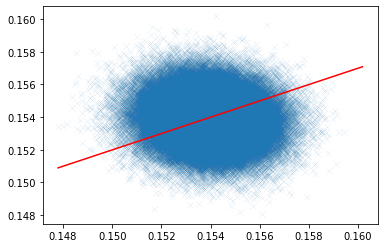

r2: -0.09967271422212418
Line Parameters: [0.49999594 0.07695353]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


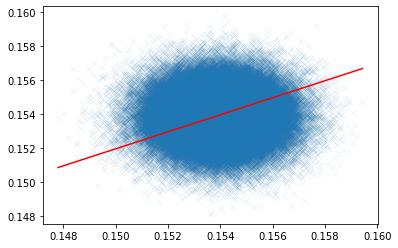

r2: 0.0057420241893799805


In [16]:
#####Are these bond lengths correlated?##### 
###Calculate and plot a best fit line, and calculate the correlation coefficient####

plt.scatter(C1C2bondlength,C2C3bondlength,marker='x',linewidth=0.05)

#######SOLUTION###########


line_fit=np.polyfit(C1C2bondlength[:,0],C2C3bondlength[:,0],1)
x = np.linspace(min(C1C2bondlength[:,0]), max(C2C3bondlength[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()
plt.clf()

r=np.corrcoef(C1C2bondlength[:,0], C2C3bondlength[:,0])
print("r2:",r[0,1])

plt.scatter(C1C2bondlength,C3C4bondlength,marker='x',linewidth=0.05)

line_fit=np.polyfit(C1C2bondlength[:,0],C3C4bondlength[:,0],1)
x = np.linspace(min(C1C2bondlength[:,0]), max(C1C2bondlength[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()

r=np.corrcoef(C1C2bondlength[:,0], C3C4bondlength[:,0])
print("r2:",r[0,1])

**HOMEWORK: Why does one pair of these bonds appear more correlated than the other?**  

Answer: The first graph plots the bond relations between C1-C2 and C2-C3. The second graph examines the relations between C1-C2 and C3-C4. Thus, the first pair appears more correlated than the other as it shares the common atom C2. In addion, the two bonds are closer to each other in the first graph, thus any orbital/physical interacations would have a greater effect.

In [17]:
## Class Activity ## Lets Turn these histograms into a probability densities and then fit them to a normal (Gaussian) Distribution

a: 0.18749591972378232 x0: 0.1539073697785078 fit_sigma: -0.0013820022236345768


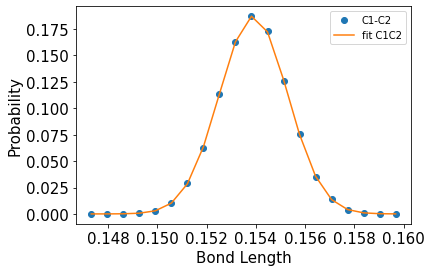

In [18]:
#Lets calculate a Probability Density and fit a gaussian to these
#First lets pull out the data in a formate we can fit
#https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

from scipy.optimize import curve_fit



#First we convery our histogram into bin centers and probabilities
#isntead of bin edges and counts:

counts, edges = np.histogram(C1C2bondlength, bins=20, range=[0.147,0.160])
centers = edges[:-1] + np.diff(edges)/2
density=counts/np.sum(counts)

def histogram_bincenters(a,x0,xmax,bins):
    counts, edges = np.histogram(a, bins=bins, range=[x0, xmax])
    centers = edges[:-1] + np.diff(edges)/2
    density=counts/np.sum(counts)
    return density, centers
    
###Now we define a gaussian function that we'll fit to our probability densities

def gauss(x, a, x0, sigma):
    return (a*np.exp(-(x-x0)**2/(2*sigma**2)))

#### Now we define a function to fit the gaussian with curve fit

def fit_gauss(x,y):
    parameters, covariance = curve_fit(gauss, x, y)
    fit_a = parameters[0]
    fit_x0 = parameters[1]
    fit_sigma = parameters[2]
    print("a:",fit_a,"x0:",fit_x0,"fit_sigma:",fit_sigma)
    fit_y = gauss(centers, fit_a, fit_x0,fit_sigma)
    return fit_y,[fit_a,fit_x0,fit_sigma] 

C1C2_density,centers=histogram_bincenters(C1C2bondlength,0.147,0.160,20)
C1C2_fit,C1C2_fit_params=fit_gauss(centers,C1C2_density)

plt.plot(centers, C1C2_density, 'o', label='C1-C2')
plt.plot(centers, C1C2_fit, '-', label='fit C1C2')


plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.show()


**Homework Problem 1:  Can you write a function to calculate the histogram, return the density and centers and fit a guassian to each of these distributions?**

a: 0.18749591972378232 x0: 0.1539073697785078 fit_sigma: -0.0013820022236345768
a: 0.18813685943112401 x0: 0.15395105102351586 fit_sigma: -0.001376993234623966
a: 0.18715041043435135 x0: 0.15390904711547354 fit_sigma: -0.0013854133318391287


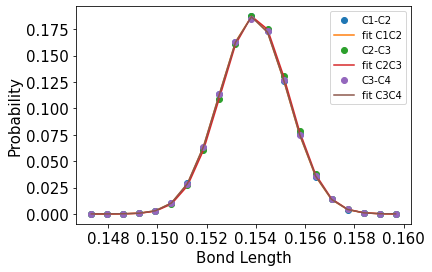

In [19]:
####SOLUTION####

def histogram_bincenters(a,x0,xmax,bins):
    counts, edges = np.histogram(a, bins=bins, range=[x0, xmax])
    centers = edges[:-1] + np.diff(edges)/2
    density=counts/np.sum(counts)
    return density, centers

def gauss(x, a, x0, sigma):
    return (a*np.exp(-(x-x0)**2/(2*sigma**2)))

def fit_gauss(x,y):
    parameters, covariance = curve_fit(gauss, x, y)
    fit_a = parameters[0]
    fit_x0 = parameters[1]
    fit_sigma = parameters[2]
    print("a:",fit_a,"x0:",fit_x0,"fit_sigma:",fit_sigma)
    fit_y = gauss(centers, fit_a, fit_x0,fit_sigma)
    return fit_y,[fit_a,fit_x0,fit_sigma] 

C1C2_density,centers=histogram_bincenters(C1C2bondlength,0.147,0.160,20)
C1C2_fit,C1C2_fit_params=fit_gauss(centers,C1C2_density)

C2C3_density,centers=histogram_bincenters(C2C3bondlength,0.147,0.160,20)
C2C3_fit,C2C3_fit_params=fit_gauss(centers,C2C3_density)

C3C4_density,centers=histogram_bincenters(C3C4bondlength,0.147,0.160,20)
C3C4_fit,C3C4_fit_params=fit_gauss(centers,C3C4_density)


plt.plot(centers, C1C2_density, 'o', label='C1-C2')
plt.plot(centers, C1C2_fit, '-', label='fit C1C2')
plt.plot(centers, C2C3_density, 'o', label='C2-C3')
plt.plot(centers, C2C3_fit, '-', label='fit C2C3')
plt.plot(centers, C3C4_density, 'o', label='C3-C4')
plt.plot(centers, C3C4_fit, '-', label='fit C3C4')

plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.show()

**Homework Problem #2: convert these probability distributions to culmulative distribution functions**

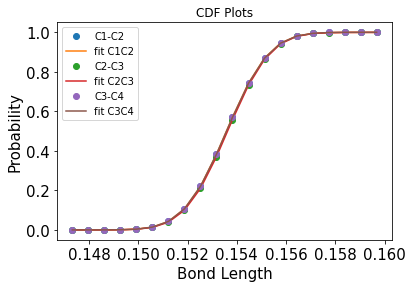

In [20]:
#Transform pdfs into cdfs
cdf_C1C2_density = np.cumsum(C1C2_density)
cdf_C1C2_fit = np.cumsum(C1C2_fit)
cdf_C2C3_density = np.cumsum(C2C3_density)
cdf_C2C3_fit = np.cumsum(C2C3_fit)
cdf_C3C4_density = np.cumsum(C3C4_density)
cdf_C3C4_fit = np.cumsum(C3C4_fit)

# Plot the graphs
plt.plot(centers, cdf_C1C2_density, 'o', label='C1-C2')
plt.plot(centers, cdf_C1C2_fit, '-', label='fit C1C2')
plt.plot(centers, cdf_C2C3_density, 'o', label='C2-C3')
plt.plot(centers, cdf_C2C3_fit, '-', label='fit C2C3')
plt.plot(centers, cdf_C3C4_density, 'o', label='C3-C4')
plt.plot(centers, cdf_C3C4_fit, '-', label='fit C3C4')

# Labels for graph 
plt.legend()
plt.title('CDF Plots')
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.show()

**Homework Problem #3: Lets draw some different some random frames from our trajectory (for example 10,100, and 1000), calculate the probability distribution functions for 5 of these random samples, and fit gaussians to these probability distirbution functions**

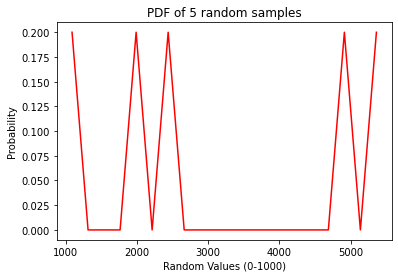

In [26]:
#This function might be helpful:
rands=np.random.randint(10000, size=(10))

# Get 5 random samples (since list is unsorted)
data = rands[0:5]

# histogram 
count, bins_count = np.histogram(data, bins=20)

# finding the PDF of the histogram using count values
pdf = count / sum(count)

# plot PDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")

plt.xlabel("Random Values (0-1000)")
plt.ylabel("Probability")
plt.title("PDF of 5 random samples")
plt.show()

a: 1.0 x0: 1.0 fit_sigma: 1.0


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


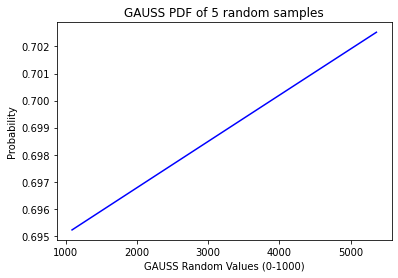

In [27]:
# rand fit - The Gauss fitting is bad with the low amount of values 
rand_fit,no_use=fit_gauss(bins_count[1:], pdf)
plt.plot(bins_count[1:], rand_fit, color="blue", label="PDF")

plt.xlabel("GAUSS Random Values (0-1000)")
plt.ylabel("Probability")
plt.title("GAUSS PDF of 5 random samples")
plt.show()

[1901  865 2302 4795 5361]


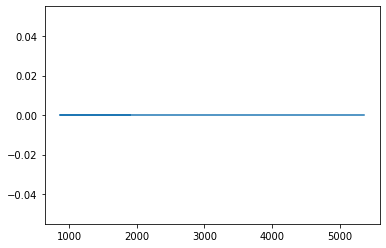

In [28]:
import scipy as sp
from scipy import stats
## x-axis for the plot
print(data)
  
## y-axis as the gaussian
y_data = stats.norm.pdf(data)
  
## plot data
plt.plot(data, y_data)

# Bond Angles and Dihedral Angles

(100000, 2)


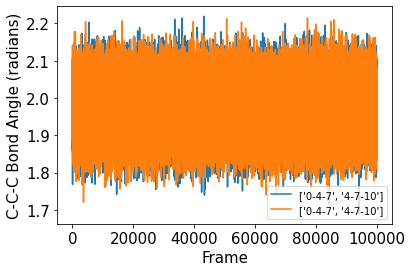

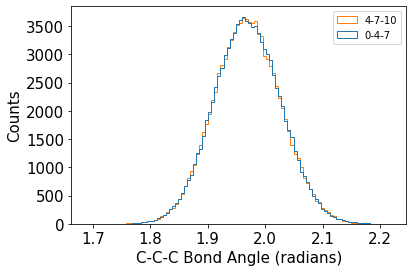

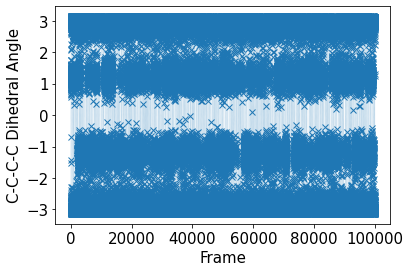

In [29]:
#Lets Compute Some Bond Angles 
Angle1=[0,4,7]
Angle2=[4,7,10]

ang = md.compute_angles(traj,[Angle1,Angle2])
#ang=np.degrees(angle_rad)
print(np.shape(ang))
plt.plot(ang,label=['0-4-7','4-7-10'])
plt.legend()
plt.xlabel('Frame', size=15)
plt.xticks(size=15)
plt.ylabel('C-C-C Bond Angle (radians)', size=15)
plt.yticks(size=15)
plt.show()

plt.show()
plt.clf()
plt.hist(ang,bins=100,histtype='step',label=['0-4-7','4-7-10'])
plt.legend()
plt.xlabel('C-C-C Bond Angle (radians)', size=15)
plt.xticks(size=15)
plt.ylabel('Counts', size=15)
plt.yticks(size=15)
plt.show()
plt.clf()

CCCC_index=[10,7,4,0]
CCCC_torsion=md.compute_dihedrals(traj, [CCCC_index])

#plt.plot(CCCC_torsion)
plt.plot(CCCC_torsion,marker='x',linewidth=.01)
#plt.xlim(0,2000)
plt.xlabel('Frame', size=15)
plt.xticks(size=15)
plt.ylabel('C-C-C-C Dihedral Angle', size=15)
plt.yticks(size=15)
plt.show()

**Homework Challenge Question: Can you estimate the lifetime of the higher energy C-C-C-C dihedral states?**

In [30]:
# Since the answer is framed as a (yes/no) questions. I answer Yes :^) it is possible to estimate the lifetime of thehigher energy CCCC dihe states

Class Activity: Are The Bond Angles and Dihedral Angle Correlated?

r2: -0.002872211807161967
[-6.26077668e-05  1.96865035e+00]


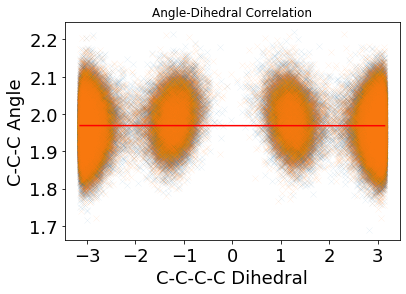

In [31]:
#Are the bond angle and dihedral correlated?

ang1=ang[:,0]
ang2=ang[:,1]

plt.scatter(CCCC_torsion,ang1,marker='x',linewidth=0.04)
plt.scatter(CCCC_torsion,ang2,marker='x',linewidth=0.04)

r=np.corrcoef(CCCC_torsion[:,0], ang1)
print("r2:",r[0,1])
line_fit=np.polyfit(CCCC_torsion[:,0],ang1,1)
x = np.linspace(min(CCCC_torsion[:,0]), max(CCCC_torsion[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print(line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlabel('C-C-C-C Dihedral', size=18)
plt.ylabel('C-C-C Angle', size=18)
plt.title('Angle-Dihedral Correlation')

plt.show()


#plt.scatter(ang1[1:-1:10],ang2[1:-1:10])
#r=np.corrcoef(ang1, ang2)
#print("Angle Correlation r^2:",r[0,1])

**Homework Problem 3: Can you express the relationsip between these two quantites using histograms and conditional probabilities ?**

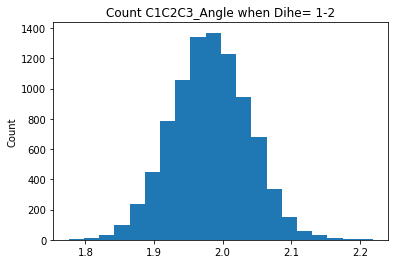

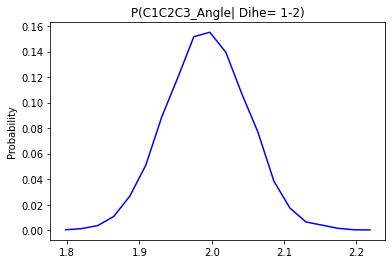

In [32]:
# Confusing because no probability -- this book says to just do this method of choosing...
# ... a dependency
# Given C-C-C-C dihedral = 1 - 2 what is the probability of CCC angle?

# find all A(angle) when given B(dihe)
index = 0
new_CCC_angle = []
for dihe in CCCC_torsion:
  if dihe >= 1 and dihe <= 2:
    new_CCC_angle.append(ang1[index])
  
  index+=1

# plot the raw histogram with counts 
plt.hist(new_CCC_angle, bins=20)
plt.xlabel("")
plt.ylabel("Count")
plt.title("Count C1C2C3_Angle when Dihe= 1-2")
plt.show()
plt.clf()


# Change it into probability distribution 
data = new_CCC_angle

# histogram 
count, bins_count = np.histogram(data, bins=20)

# finding the PDF of the histogram using count values
pdf = count / sum(count)

# plot PDF
plt.plot(bins_count[1:], pdf, color="blue", label="PDF")

plt.xlabel("")
plt.ylabel("Probability")
plt.title("P(C1C2C3_Angle| Dihe= 1-2)")
plt.show()

Class Activity: Lets Calculate the Autocorrelation Times of C-C Bonds, C-C-C Angles, and C-C-C-C Dihedrals

[0.00000e+00 2.00002e-01 4.00004e-01 ... 1.99996e+04 1.99998e+04
 2.00000e+04]


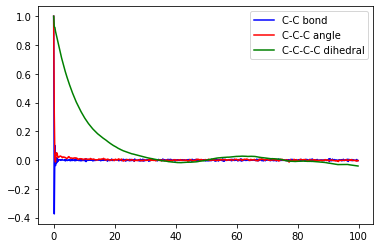

In [33]:
#Lets Calculate the autocorrelation times for bond lengths, bond angles, and torsions:
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else numpy.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return numpy.array(corr)

#time in picoseconds
time=np.linspace(0,20000,traj.n_frames)
print(time)

lags=range(500)
#C1C2bondlength[:,0]
bond_autocor=autocorr1(C1C2bondlength[:,0],lags)
ang_autocor=autocorr1(ang1,lags)
dihe_autocor=autocorr1(np.cos(CCCC_torsion[:,0]),lags)
plt.plot(time[lags],bond_autocor,color='b',label='C-C bond')
plt.plot(time[lags],ang_autocor,color='r',label='C-C-C angle')
plt.plot(time[lags],dihe_autocor,color='g',label='C-C-C-C dihedral')
plt.legend()

#XML files

Class Activity: Lets Dig Into force field XML file and make plots of the force field torsion terms <br> 

Documentation of Torsion Term Conventions: <br> 

https://ambermd.org/doc12/Amber21.pdf#page=264 <br> 

http://docs.openmm.org/latest/userguide/application/05_creating_ffs.html#basic-concepts <br> 

From Butane.gaff2.xml

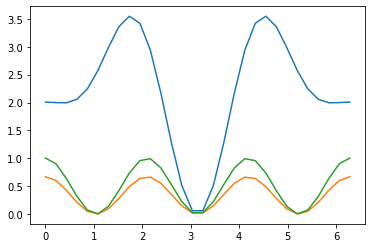

In [34]:
#Plot The Torsion Force Field Terms

#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets right a function that takes paramters from the xml and writes the force field term

def calc_torsion_energy(angle,k1,period,phase):
     e=k1*(1+np.cos(period*angle-phase))
     return e

def CCCC_torsionE(angle):
 e1=calc_torsion_energy(angle,0.4602,1,0)
 e2=calc_torsion_energy(angle,1.2134,2,3.1416)
 e3=calc_torsion_energy(angle,0.5439,3,0)
 return e1+e2+e3

def CCCH_torsionE(angle):
 e1=calc_torsion_energy(angle,0.3347,3,0)
 return e1

def HCCH_torsionE(angle):
 e1=calc_torsion_energy(angle,0.50208,3,0)
 return e1

CCCC_e=CCCC_torsionE(rad_ang)
CCCH_e=CCCH_torsionE(rad_ang)
HCCH_e=HCCH_torsionE(rad_ang)


plt.plot(rad_ang,CCCC_e)
plt.plot(rad_ang,CCCH_e)
plt.plot(rad_ang,HCCH_e)

In [35]:
##Lets Review all our atoms as we attempt to tabulate all the relevant torsion terms
atoms, bonds = traj.topology.to_dataframe()
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,NBU,0,
1,2,H11,H,1,NBU,0,
2,3,H12,H,1,NBU,0,
3,4,H13,H,1,NBU,0,
4,5,C2,C,1,NBU,0,
5,6,H21,H,1,NBU,0,
6,7,H22,H,1,NBU,0,
7,8,C3,C,1,NBU,0,
8,9,H31,H,1,NBU,0,
9,10,H32,H,1,NBU,0,


In [36]:
#Lets Tally Up All The Torsions Along the Central Carbon
#Atomnames: (H41,H42,H43)-C4-C3(H31,H32)-C2(H21,H22)-C1(H11,H12,H13)
#Atomnumbers: (13,12,11)-10-(8,9)7-4(5,6)-0(1,2,3)

**Homework Problem #5: Many of These Correlations will be highly Correlated Select Some Torsions that are Correlated, and some that are not, and make scatter plots of their relationships**

Explanation: Hydrogens on carbon 2 and 3 - when the central carbons rotate, the hydrogens must move (must rotate) thus there is that relation. (Both may eclipse at the same time. However in the second graph, since we are on a terminal carbon, that carbon's rotation does not change CCCC dihedrals. Thus, there is no correlation. 

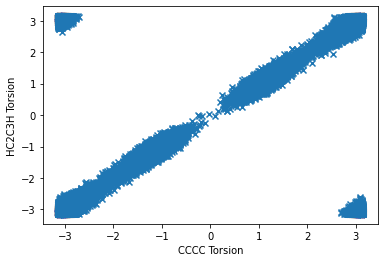

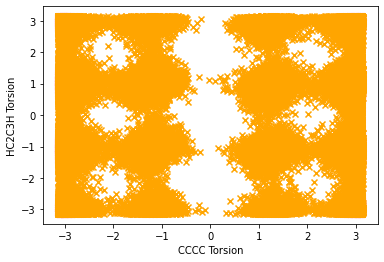

<Figure size 432x288 with 0 Axes>

In [37]:
####Homework Problem 5 - Correlations in torsion paramters###
#PLOT SOME TORSIONS THAT YOU EXPECT TO BE HIGHLY CORRELATED - EXPLAIN WHY - EXPLAIN WHAT OU SEE
#Consider CCCC vs. [8,7,4,5]
#explaination above 
CCCC_torsion=md.compute_dihedrals(traj, [[0,4,7,10]])
HCCH_tor_8745=md.compute_dihedrals(traj, [[8,7,4,5]])

plt.scatter(CCCC_torsion, HCCH_tor_8745, marker='x')
plt.xlabel("CCCC Torsion")
plt.ylabel("HC2C3H Torsion")
plt.show()
plt.clf()

#PLOT SOME TORSIONS THAT YOU EXPECT TO BE UNCORRELATED - Explain what you see
#Consider CCCC vs. [12,10,7,9]
#explanation above 
HCCH_tor_12_10_7_9 =md.compute_dihedrals(traj, [[12,10,7,9]])
plt.scatter(CCCC_torsion, HCCH_tor_12_10_7_9, marker='x', color="orange")
plt.xlabel("CCCC Torsion")
plt.ylabel("HC2C3H Torsion")
plt.show()
plt.clf()


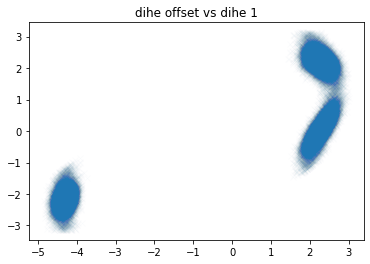

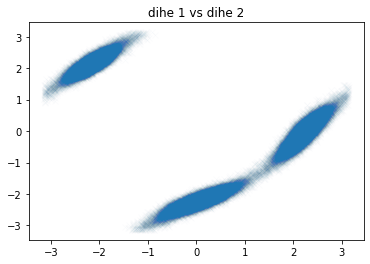

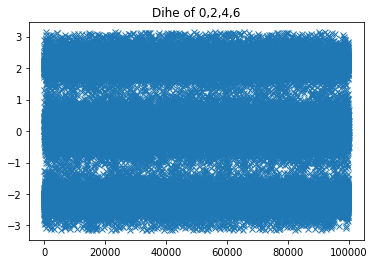

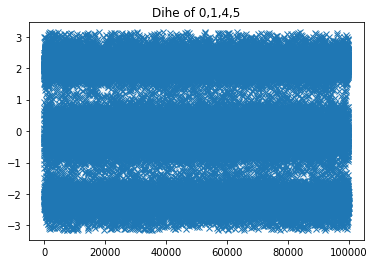

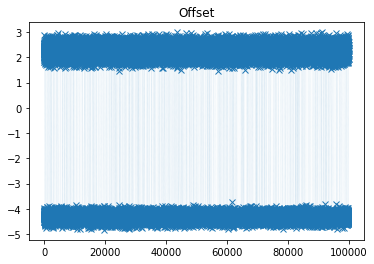

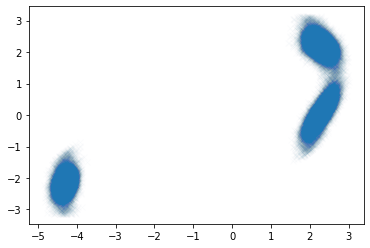

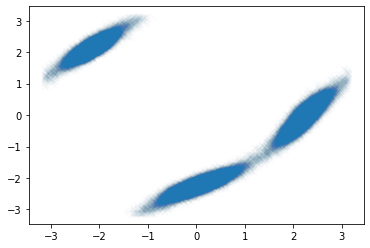

In [39]:
#SELECT TWO TORSIONS THAT YOU EXPECT TO HAVE A SYSTEMATIC OFFSET 
#CALCULATE THEIR OFFSET IN EACH FRAME - EXPLAIN YOUR RESULT
#plt.scatter(CCCC_torsion,HCCH_torsions[:,1],marker='x',linewidth=0.04)
#diff=CCCC_torsion[:,0]-HCCH_torsions[:,3]


# CCCC vs. [8,7,4,5] have a systematic offset 

one=md.compute_dihedrals(traj, [[0,2,4,6]])
two=md.compute_dihedrals(traj, [[0,1,4,5]])
offset = one - two

# Scatter
plt.scatter(offset, one, marker= 'x', linewidth=.01)
plt.title("dihe offset vs dihe 1")
plt.show()
plt.clf()

plt.scatter(one, two, marker= 'x', linewidth=.01)
plt.title("dihe 1 vs dihe 2")
plt.show()
plt.clf()



# what is is before 
plt.plot(one, marker= 'x', linewidth=.01)
plt.title("Dihe of 0,2,4,6")
plt.show()
plt.clf() 
# what is is before 
plt.plot(two, marker= 'x', linewidth=.01)
plt.title("Dihe of 0,1,4,5")
plt.show()
plt.clf()


# Offset 
offset = one - two
plt.plot(offset, marker= 'x', linewidth=.01)
plt.title("Offset")
plt.show()
plt.clf()

plt.scatter(offset, one, marker= 'x', linewidth=.01)
plt.show()
plt.clf()

plt.scatter(one, two, marker= 'x', linewidth=.01)

# EXPLAIN: the rotations are literally a roughly constant degrees ahead.
# That is why the offset only carries a band of degrees. 



Text(0, 0.5, 'Energy')

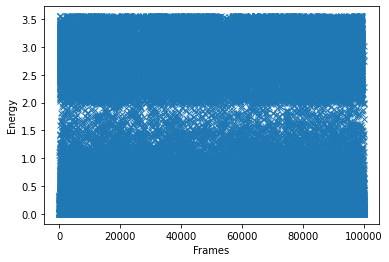

In [40]:
#COMPUTE THE TOTAL TORSION FORCE FIELD ENERGY PER FRAME

# I don't know what this even means - do you want me to add all the dihedrals
# togehter? 
# lets just look a CCCC
# The graph looks like this because the molecule spins alot of 100000 frames
CCCC_torsion
CCCC_Energy = []
for radian in CCCC_torsion:
  CCCC_Energy.append(CCCC_torsionE(radian))

plt.plot(CCCC_Energy, marker = 'x', linewidth=.01)
plt.xlabel("Frames")
plt.ylabel("Energy")


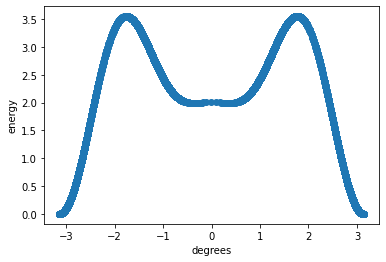

<Figure size 432x288 with 0 Axes>

In [41]:
#Compare the time course of CCCC torsion with its energy 
#Interpret what you are seeing in terms of conformations and energies

# I plotted the time course above, but this believe the graph below is more interesting 
plt.scatter(CCCC_torsion, CCCC_Energy)
plt.xlabel("degrees")
plt.ylabel("energy")
plt.show()
plt.clf()
# at Zero Radians, it is in gauche which is stable and at pi radians it is gauche again 
# but with carbons opposing each other, the stablest of them all 


**Homework Problem #6: Lets modify the C-C-C-C Torsion Potential to change the dihedral distribution**

In [ ]:
 # Here are the new values I chose
 <PeriodicTorsionForce>
  <Proper class1="c3" class2="c3" class3="c3" class4="c3" periodicity1="3" phase1="0.0" k1="0.5000" 
          periodicity2="2" phase2="3.1416" k2="1.0000" periodicity3="1" phase3="0.0" k3="0.4000"/>
  <Proper class1="c3" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.3000"/>
  <Proper class1="hc" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.4000"/>
 </PeriodicTorsionForce>

**Homework Problem #7: Attempt to run a new MD Simulation with your modified torsion potential**

In [43]:
from openmm import app
import openmm as mm
from openmm import unit

In [44]:
gaff_filepath = '/content/drive/MyDrive/School /CHEM 96: Computational Chem /Project 2/data/butane.gaff2.cor1.xml'

pdb = mm.app.PDBFile('/content/drive/MyDrive/School /CHEM 96: Computational Chem /Project 1/data/butane.pdb')
forcefield = mm.app.ForceField(gaff_filepath)

In [45]:
# Set up the system for MD simulation
# @params: no cutoff & constrain bonds with hydrogens
system = forcefield.createSystem(pdb.topology, nonbondedMethod=app.NoCutoff, constraints=app.HBonds)

In [46]:
# Integreate Newton's equations of motion
# Using Langevin Integrator, T = 298.15 K, in vacuum
# stochastic integrator with 5.0 picosecond coupling constant
integrator = mm.LangevinIntegrator(298.15*unit.kelvin, 5.0/unit.picoseconds, 2.0*unit.femtoseconds)
integrator.setConstraintTolerance(1e-5)

In [47]:
# Concatenate all the simulation pieces
platform = mm.Platform.getPlatformByName('Reference')
simulation = app.Simulation(pdb.topology, system, integrator, platform)
simulation.context.setPositions(pdb.positions)

# Moves aatoms of the molecule slightly to get a local min in energy
print('Minimizing...')

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")

simulation.minimizeEnergy(maxIterations=100)

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

# Purpose of equilibration is to get system to target temp and ready for production run.
# stdout asks program to print information. 
from sys import stdout

print('Equilibrating...')

simulation.reporters.append(app.StateDataReporter(stdout, 100, step=True, 
    potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(150.0*unit.kelvin)
simulation.step(2500)

# Longer block of simulation
# includes timer 
import time as time

print('Running Production...')

# Begin timer
tinit=time.time()

# Clear simulation reporters
simulation.reporters.clear()

# Reinitialize simulation reporters. We do this because we want different information printed from the production run than the equilibration run.
# output basic simulation information below every 250000 steps - (which is equal to 2 fs(250,000) = 500,000 fs = 500 ps)
simulation.reporters.append(app.StateDataReporter(stdout, 250000, 
    step=True, time=True, potentialEnergy=True, temperature=True, 
    speed=True, separator=','))

# write out a trajectory (i.e., coordinates vs. time) to a DCD
# file every 100 steps - 0.2 ps
simulation.reporters.append(app.DCDReporter('butane_sim_cor1.dcd', 100))

# run the simulation for 1.0x10^7 steps - 20 ns
simulation.step(10000000)

# End timer
tfinal=time.time()
print('Done!')
print('Time required for simulation:', tfinal-tinit, 'seconds')

Minimizing...
Potential energy before minimization is 5.793332957182225 kJ/mol
Potential energy after minimization is 5.288322719382298 kJ/mol
Equilibrating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
100,31.179593279755466,186.1048014131915
200,34.84727917718583,252.06366709352685
300,53.2668277342541,300.49267537132073
400,39.33641089367641,257.6854477568476
500,49.62113301861132,215.2806793719982
600,51.31822489981499,281.9529926541623
700,58.77693524773318,270.0871033027063
800,33.57524178310277,369.4450356643127
900,29.45267887916797,250.61884720158005
1000,30.899475244802044,270.65042717037477
1100,29.666955521154726,394.2784046635633
1200,40.30174000076822,331.7818011978817
1300,36.187110127107196,263.49913930664155
1400,27.053382855871458,458.76713025494416
1500,36.11345823929299,356.1815702750065
1600,31.603575797750757,344.30514822437357
1700,45.37359349154102,208.00659404814755
1800,31.9168535536755,284.98720235390596
1900,49.938335398961804,211.4067604781574
2

In [48]:
traj = md.load('/content/drive/MyDrive/School /CHEM 96: Computational Chem /Project 2/data/butane_sim_cor1.dcd', top='/content/drive/MyDrive/School /CHEM 96: Computational Chem /Project 1/data/butane.pdb')
atoms, bonds = traj.topology.to_dataframe()
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,NBU,0,
1,2,H11,H,1,NBU,0,
2,3,H12,H,1,NBU,0,
3,4,H13,H,1,NBU,0,
4,5,C2,C,1,NBU,0,
5,6,H21,H,1,NBU,0,
6,7,H22,H,1,NBU,0,
7,8,C3,C,1,NBU,0,
8,9,H31,H,1,NBU,0,
9,10,H32,H,1,NBU,0,


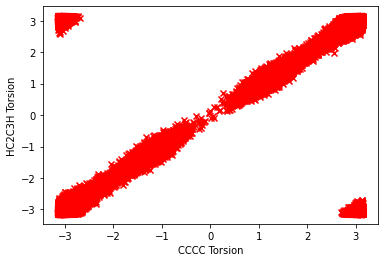

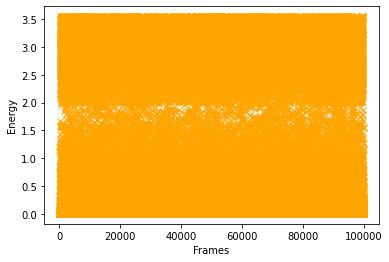

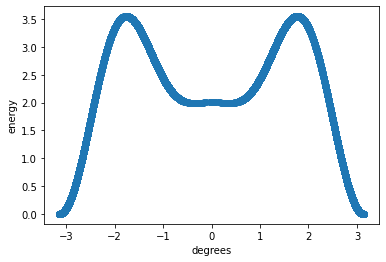

<Figure size 432x288 with 0 Axes>

In [49]:
# Analysis DIHE
CCCC_torsion=md.compute_dihedrals(traj, [[0,4,7,10]])
HCCH_tor_8745=md.compute_dihedrals(traj, [[8,7,4,5]])

plt.scatter(CCCC_torsion, HCCH_tor_8745, color = 'red', marker='x')
plt.xlabel("CCCC Torsion")
plt.ylabel("HC2C3H Torsion")
plt.show()
plt.clf()

#COMPUTE THE TOTAL TORSION FORCE FIELD ENERGY PER FRAME
CCCC_torsion
CCCC_Energy = []
for radian in CCCC_torsion:
  CCCC_Energy.append(CCCC_torsionE(radian))

plt.plot(CCCC_Energy, marker = 'x', color = 'orange', linewidth=.01)
plt.xlabel("Frames")
plt.ylabel("Energy")
plt.show()
plt.clf()

plt.scatter(CCCC_torsion, CCCC_Energy)
plt.xlabel("degrees")
plt.ylabel("energy")
plt.show()
plt.clf()



In [ ]:
# I suppose not enough changed as my constant change was not very drastic 

**Homework Problem #8: Calculate LJ and Coulumb Forcefield Potentials for 3 types of atom pairs**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in subtract
  if sys.path[0] == '':


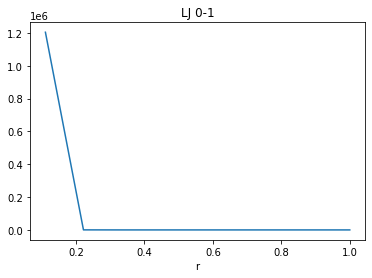

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide


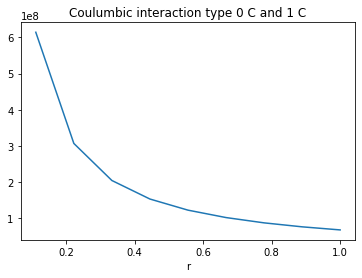

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in subtract


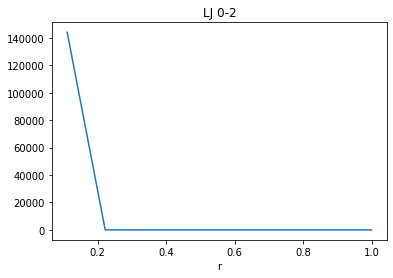

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in true_divide


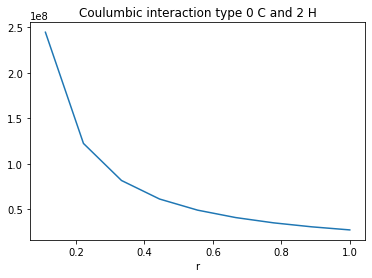

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in subtract


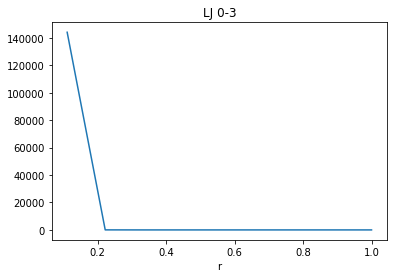

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in true_divide


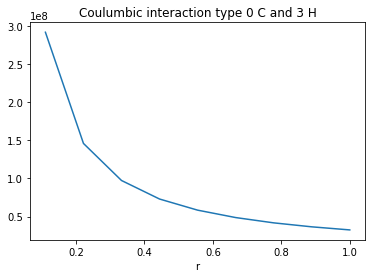

<Figure size 432x288 with 0 Axes>

In [76]:
# LJ potentials and Columbic Forecefield potentials -- this follows the formula provided in the ameber21 guide 

# 0-1 ------------------------------------
# LJ 
ep = .5*(0.4510352 + 0.4510352) 
sig = (0.3397710*0.3397710)**.5

A = 4*ep*(sig**12) 
B = 4*ep*(sig**6)
r = np.linspace (0, 1, num=10)

V = (A/(r**12)) - (B/(r**6))

plt.plot(r, V)
plt.title("LJ 0-1")
plt.xlabel("r")
plt.show()
plt.clf()

# Coulumbic 
q1 = -0.0932
q2 = -0.0814

pi = 3.14
e0 = 8.85*(10**-12)

E = (1/(4*pi*e0)) * ((((q1*q2)**2)**.5)/r)

plt.plot(r, E)
plt.title("Coulumbic interaction type 0 C and 1 C")
plt.xlabel("r")
plt.show()
plt.clf()


# 0-2 ------------------------------------

# LJ
ep = .5*(0.4510352 + 0.0870272) 
sig = (0.3397710*0.2600177)**.5

A = 4*ep*(sig**12) 
B = 4*ep*(sig**6)
r = np.linspace (0, 1, num=10)

V = (A/(r**12)) - (B/(r**6))

plt.plot(r, V)
plt.title("LJ 0-2")
plt.xlabel("r")
plt.show()
plt.clf()

# Coulumbic 
q1 = -0.0932
q2 = 0.0324

pi = 3.14
e0 = 8.85*(10**-12)

E = (1/(4*pi*e0)) * ((((q1*q2)**2)**.5)/r)
plt.plot(r, E)
plt.title("Coulumbic interaction type 0 C and 2 H")
plt.xlabel("r")
plt.show()
plt.clf()


# 0-3 ------------------------------------

# LJ
ep = .5*(0.4510352 + 0.0870272) 
sig = (0.3397710*0.2600177)**.5

A = 4*ep*(sig**12) 
B = 4*ep*(sig**6)
r = np.linspace (0, 1, num=10)

V = (A/(r**12)) - (B/(r**6))

plt.title("LJ 0-3")
plt.xlabel("r")
plt.plot(r, V)
plt.show()
plt.clf()

# Coulumbic 
q1 = -0.0932
q2 = 0.0387

pi = 3.14
e0 = 8.85*(10**-12)

E = (1/(4*pi*e0)) * ((((q1*q2)**2)**.5)/r)
plt.plot(r, E)

plt.title("Coulumbic interaction type 0 C and 3 H")
plt.xlabel("r")
plt.show()
plt.clf()




There are some challenge problems if you would like to attempt those